<a href="https://colab.research.google.com/github/CillaCole/Project-2/blob/main/Final_Stroke_Prediction_Dataset_PC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Stroke Prediction
- Priscilla E. Cole

- The objective is to use the features to determine whether the patient will have a stroke or not. 

In [1]:
# import libraries for data, cleaning and eda
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# import libraries for ML preparation
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
# import libraries for modeling
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report
from sklearn.decomposition import PCA
from sklearn import set_config
set_config(display = 'diagram')

In [2]:
# load dataset
df = pd.read_csv('/content/healthcare-dataset-stroke-data.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


# Data Cleaning
- Delete any unnecessary columns
- Check for and address missing data
- Check for and address and duplicated values
- Identify and correct inconsistencies in categorical values
- Identify and address any outliers

In [3]:
# make a ML copy as to not taint any original data
ml_df = df.copy()
# make an EDA copy for visualizations and interpretations
eda_df = df.copy()

In [4]:
# check for duplicated values
ml_df.duplicated().sum()

0

In [5]:
# check for any missing data
ml_df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [6]:
# check for outliers in numerical columns
ml_df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [7]:
# checking for any categorical inconsistencies
dtypes = ml_df.dtypes
obj_cols = dtypes[dtypes=='object'].index
obj_cols

Index(['gender', 'ever_married', 'work_type', 'Residence_type',
       'smoking_status'],
      dtype='object')

In [8]:
# check for inconsistencies in categorical data
for col in obj_cols:
  print(f'-Columns={col}')
  print(df[col].value_counts(dropna=False))
  print('/n/n')

-Columns=gender
Female    2994
Male      2115
Other        1
Name: gender, dtype: int64
/n/n
-Columns=ever_married
Yes    3353
No     1757
Name: ever_married, dtype: int64
/n/n
-Columns=work_type
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64
/n/n
-Columns=Residence_type
Urban    2596
Rural    2514
Name: Residence_type, dtype: int64
/n/n
-Columns=smoking_status
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64
/n/n


In [9]:
ml_df.loc[3116, 'gender']

'Other'

In [10]:
# addressing inconsistency in gender column by dropping the row containing 'other'
ml_df = ml_df.drop(labels=3116, axis=0)

In [11]:
eda_df.loc[3116, 'gender']

'Other'

In [12]:
eda_df = eda_df.drop(labels=3116, axis=0)

In [13]:
ml_df['gender'].value_counts()

Female    2994
Male      2115
Name: gender, dtype: int64

In [14]:
# addressing missing data in the 'bmi' category by filling those values with the mean
eda_df['bmi'].fillna(value = df['bmi'].mean(), inplace = True)

In [15]:
eda_df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000
mean,36513.985516,43.229986,0.097475,0.054022,106.140399,28.894508,0.048738
std,21162.008804,22.613575,0.296633,0.226084,45.285004,7.698235,0.215340
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17740.000000,25.000000,0.000000,0.000000,77.240000,23.800000,0.000000
50%,36922.000000,45.000000,0.000000,0.000000,91.880000,28.400000,0.000000
75%,54643.000000,61.000000,0.000000,0.000000,114.090000,32.800000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [16]:
# keep missing data in ml copy until after imputing to prevent data leakage
ml_df. describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000,4908.00000,5109.000000
mean,36513.985516,43.229986,0.097475,0.054022,106.140399,28.89456,0.048738
std,21162.008804,22.613575,0.296633,0.226084,45.285004,7.85432,0.215340
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.30000,0.000000
25%,17740.000000,25.000000,0.000000,0.000000,77.240000,23.50000,0.000000
50%,36922.000000,45.000000,0.000000,0.000000,91.880000,28.10000,0.000000
75%,54643.000000,61.000000,0.000000,0.000000,114.090000,33.10000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.60000,1.000000


# Exploratory Visualizations
- Produce two univariate visuals for interpretation
- Produce two multivariate visuals for interpretation and further understanding
- Choose two visualizations from your analysis that demonstrate key trends you found that will be of interest to a stakeholder. These visuals should be reporting quality with titles, labels, and a short explanation of the trend. Be sure to explain in a text cell the finding associated with each visual. Both of these visualizations should be easily understood by a non-technical audience (Neither should be histograms, boxplots, or correlation plots).

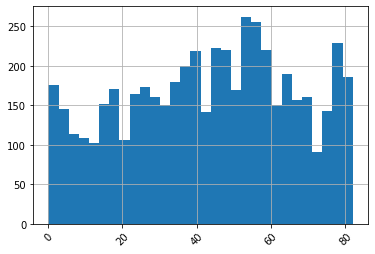

In [17]:
# univariate histogram to display
eda_df['age'].hist(bins = 30)
plt.xticks(rotation = 45)
plt.ticklabel_format(useOffset=False, style='plain')

- This histogram was chosen to show the distribution of ages for the individuals considered in this dataset. We can see that there is a good distribution of ages from infant to elderly shown in this dataset.

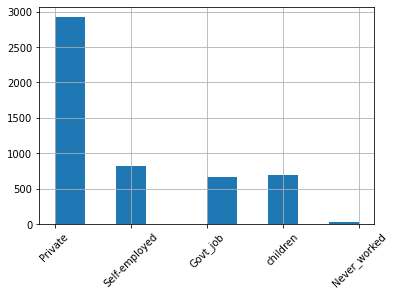

In [18]:
# histogram to show the work types of the individuals
eda_df['work_type'].hist()
plt.xticks(rotation = 45);

- The majority of individuals represented in this dataset are employed with private companies, as opposed to being self-employed, having a government job, being a child with no job or having never worked.

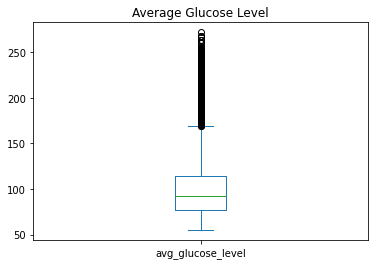

In [19]:
#Boxplot of average glucose level
eda_df['avg_glucose_level'].plot(kind='box')
plt.title('Average Glucose Level');


- As one could expect (since there is a wide range), the average glucose level among the dataset is distributed with some outliers present.

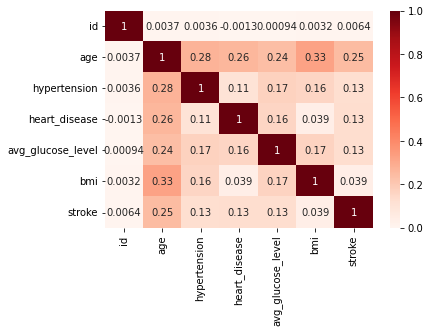

In [20]:
# heatmap to display the correlation between the target and its features
corr = eda_df.corr()
eda_df.style.use('seaborn')
sns.heatmap(corr, cmap = 'Reds', annot = True);

- This heatmap displays a negative correlation between our target (stroke) and only one feature (id). Being that id is only a patient identifier, we can state that there is an overall positive correlation (between low and moderate) between our target and theo ther features.

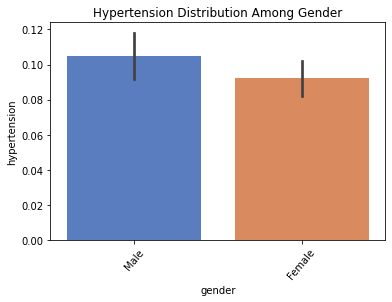

In [21]:
# bar plot to see what other associations I can find
eda_df.style.use('seaborn')
ax = sns.barplot(data = ml_df, x = 'gender', y = 'hypertension', palette = 'muted')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 50);
ax.set_title('Hypertension Distribution Among Gender');

- This barplot displays that males have higher hypertension than females. This will be kept in mind as we explore which gender is more likely to have a stroke to see if they agree. 

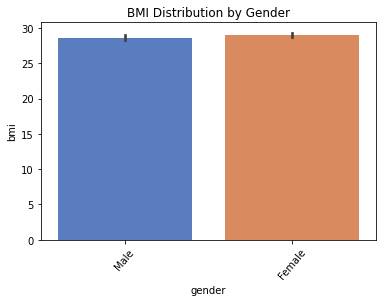

In [22]:
eda_df.style.use('seaborn')
ax = sns.barplot(data = ml_df, x = 'gender', y = 'bmi', palette = 'muted')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 50);
ax.set_title('BMI Distribution by Gender');

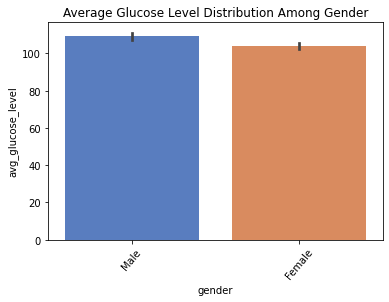

In [23]:
eda_df.style.use('seaborn')
ax = sns.barplot(data = ml_df, x = 'gender', y = 'avg_glucose_level', palette = 'muted')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 50);
ax.set_title('Average Glucose Level Distribution Among Gender');

# Stakeholder
- I decided to use various bar charts in this section to see what hypotheses I could make regarding gender and other features that research has shown as being a gateway to having a stroke. We are showing males having higher hypertension, and higher average glucose levels; but women have just a little bit of an edge more than men with bmi level. Could this be because males are more likely to have stroke than women? 

# Model Preparation
- Ensure that you complete the appropriate pre-processing steps.
- Try multiple models and tune the hyperparameters of each model to optimize model performance (include all models and hyperparameters tested in addition to the final model).
- Perform PCA or another feature engineering technique on your dataset to see how this impacts your results. (We encourage you to try multiple techniques depending on your data!).
- Evaluate model performance with appropriate metrics for the model.
- Choose your "production" model and justify this decision.
- Go back through your code and ensure that you have provided clear comments (remember this is for your portfolio!).
- Update your project readme and describe your final model, your final model evaluation metrics, and explain whether or not your model would be useful in production and if so, how it should be used.

In [24]:
# check how balanced the target is
ml_df['stroke'].value_counts()

0    4860
1     249
Name: stroke, dtype: int64

- Approximately 95% of the target variable corresponds to 0's and approximately 5% corresponds to 1's. The target variable is unbalanced.

In [25]:
# assign features X and target y
# the target in this data is 'stroke'
y = ml_df['stroke']
X = ml_df.drop(columns = 'stroke')

In [26]:
# train test validation split
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 42)

In [27]:
# for imputation of missing values
mean_imputer = SimpleImputer(strategy='mean')

# instantiate the Standard Scaler for scaling numeric values
scaler = StandardScaler()
# instantiate one hot encoder for the categorical columns
ohe = OneHotEncoder(sparse = False, handle_unknown = 'ignore')

# instantiate pipelines for numeric and categorical columns
num_pipe = make_pipeline(mean_imputer, scaler)
cat_pipe = make_pipeline(ohe)

# Create ColumnSelectors for the the numeric and categorical data
cat_selector = make_column_selector(dtype_include='object')
num_selector = make_column_selector(dtype_include='number')

# match each transformer with the appropriate selector in a tuple
num_tuple = (num_pipe, num_selector)
cat_tuple = (cat_pipe, cat_selector)

# create a preprocessor for the trasformed columns
processed = make_column_transformer(cat_tuple, num_tuple, remainder = 'passthrough')

In [28]:
# transform data and fit on training data
processed.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline-1',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f54937da7d0>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f5493766550>)])

In [29]:
# fit column transformers on train and test sets
X_trainpro = processed.transform(X_train)
X_testpro = processed.transform(X_test)

# Classification Model #1: Decision Tree Classifier

In [31]:
# instantiate the model with default parameters
dec_tree = DecisionTreeClassifier(random_state = 42)

param_grid = {'max_depth': [1,2,3],
              'min_samples_leaf': [3,15,20],
              'min_samples_split': [2, 10, 100]}

In [32]:
dt_grid_search = GridSearchCV(dec_tree, param_grid)

In [33]:
dt_grid_search.fit(X_trainpro, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [1, 2, 3],
                         'min_samples_leaf': [3, 15, 20],
                         'min_samples_split': [2, 10, 100]})

In [34]:
dt_grid_search.best_params_

{'max_depth': 1, 'min_samples_leaf': 3, 'min_samples_split': 2}

In [35]:
# get parameters
dec_tree.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 42,
 'splitter': 'best'}

In [36]:
# create a pipeline for processed data
dec_pipe = make_pipeline(processed, dec_tree)
dec_pipe

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f54937da7d0>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f5493766550>)])),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(random_state=42))])

In [37]:
# fit the model on the training data to learn the relationship betwee X and y
dec_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f54937da7d0>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f5493766550>)])),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(random_state=42))])

In [38]:
# get predictions 
dec_pred = dec_pipe.predict(X_test)
dec_pred

array([0, 0, 0, ..., 0, 0, 0])

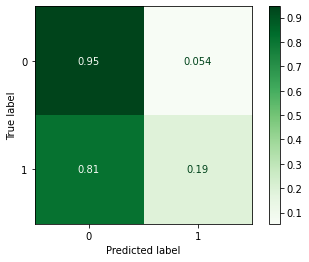

In [39]:
# create a confusion matrix display to get a clear view of the predicted results
ConfusionMatrixDisplay.from_predictions(y_test, dec_pred, normalize='true', cmap='Greens');

- This confusion matrix shows: 
- 95% true positive
- 5.4% false positive
- 81% false negative
- 19% false positive

In [42]:
# evaluate the model
# print the classiffication report from the test data
print(classification_report(y_test, dec_pred))
print(f' Classification report for Decision Tree')

              precision    recall  f1-score   support

           0       0.95      0.95      0.95      1198
           1       0.19      0.19      0.19        80

    accuracy                           0.90      1278
   macro avg       0.57      0.57      0.57      1278
weighted avg       0.90      0.90      0.90      1278

 Classification report for Decision Tree


# Classification Model #2: KNN Classifier

In [ ]:
# instantiate the model
knn = KNeighborsClassifier()

In [ ]:
# get the parameters for knn model
knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [ ]:
# create a pipeline for the data
knn_pipe = make_pipeline(processed, knn)
knn_pipe

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fcbdf0fd650>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fcbdf0fdb50>)])),
                ('kneighborsclassifier', KNeighborsClassifier())])

In [ ]:
# fit the model on the trainin data to learn the relationship between X and y
knn_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fcbdf0fd650>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fcbdf0fdb50>)])),
                ('kneighborsclassifier', KNeighborsClassifier())])

In [ ]:
# make predictions 
knn_pred = knn_pipe.predict(X_test)
knn_pred

array([0, 0, 0, ..., 0, 0, 0])

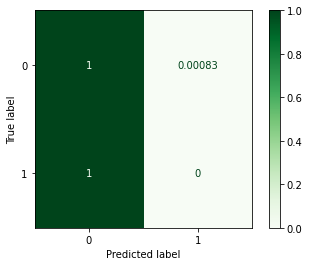

In [ ]:
# create a confusion matrix display to get a clear view of the predicted results
ConfusionMatrixDisplay.from_predictions(y_test, knn_pred, normalize='true', cmap='Greens');

- This confusion matrix shows:
- 100% true positive
- .083% false positive
- 100% false negative
- 0% true negative

In [ ]:
%%time
# evaluate the model
# print the classiffication report from the test data
print(f' Classification report for KNN model')
print(classification_report(y_test, knn_pred))

 Classification report for KNN model
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1198
           1       0.00      0.00      0.00        80

    accuracy                           0.94      1278
   macro avg       0.47      0.50      0.48      1278
weighted avg       0.88      0.94      0.91      1278

CPU times: user 11.3 ms, sys: 0 ns, total: 11.3 ms
Wall time: 12.5 ms


# PCA/Feature Engineering

In [ ]:
# PCA, retaining 95% of the variance
pca = PCA(n_components = 1)
# instantiate pipeline
pcaknn_pipe = make_pipeline(processed, pca, knn)
pcaknn_pipe

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fcbdf0fd650>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fcbdf0fdb50>)])),
                ('pca', PCA(n_components=1)),
                ('kneighborsclassifier', KNeighborsClassifier())])

In [ ]:
# fit PCA pipe on training data to learn the relationship between X and y
pcaknn_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fcbdf0fd650>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fcbdf0fdb50>)])),
                ('pca', PCA(n_components=1)),
                ('kneighborsclassifier', KNeighborsClassifier())])

In [ ]:
%%time
# predictions with the PCA evaluation via classification report
pcapreds = pcaknn_pipe.predict(X_test)
print(classification_report(y_test, pcapreds))

              precision    recall  f1-score   support

           0       0.94      0.99      0.97      1198
           1       0.12      0.01      0.02        80

    accuracy                           0.93      1278
   macro avg       0.53      0.50      0.49      1278
weighted avg       0.89      0.93      0.91      1278

CPU times: user 72 ms, sys: 56.5 ms, total: 128 ms
Wall time: 71.7 ms


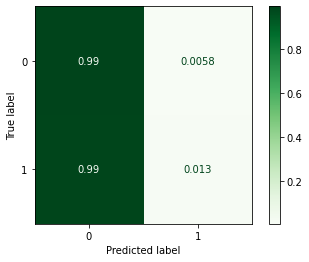

In [ ]:
# create a confusion matrix display to get a clear view of the predicted results
ConfusionMatrixDisplay.from_predictions(y_test, pcapreds, normalize='true', cmap='Greens');

- This KNNPCA confusion matrix shows:
- 99% true positive
- .058% false positive
- 99% false negative
- 1.3% true negative

- KNNPCA with .95 had a macro average f1 score 50% and ran in 244 ms.
- KNNPCA with 1 had a macro average f1 score of 49% and ran in 128 ms.
- KNN with no PCA had a macro f1 score of 48% and ran in 11.3 ms

# Production Model Choice

- I am choosing to move forward with the KNN model classifier with PCA retaining 95% as the production choice on this dataset. This model was chosen because based on the macro f1 score (the chosen evaluation metric), it produced the best result, even though it did take the most time. 
- Since our target variable was highly imbalanced to the tune of approximately 95% no stroke, 5% stroke, the accuracy metrics for all models met near the baseline, which basically reinforced what was already expected based on the dataset. This is why accuracy was not a chosen evaluation metric when choosing a model. 
- A false positive would mean that the model predicted someone would have a stroke, when that person would not actually have a stroke. While it is not ideal to misdiagnose someone, a false positive would give a patient medications and treatment that they might not need. On a possible bright side, that patient would get health inforamtion to aid in making lifestyle choice that deter them away from having a stroke. 
- A false negative indicates that it was predicted that the person would not have a stroke, but the person did have a stroke. Within this dataset, a false negative would be worse because not correctly diagnosing a stroke would mean that a person is not getting the proper medications, treatment, or health information that they need to make improvements, thus jeopardizing their health further. 